## Projet Final Phase 3: Prediction sur le Diabet

## Plan de travail

1. Compréhension des entreprises
2. Compréhension des données
3. Préparation des données
4. Modèle (Approche itérative)
5. Évaluation
6. Discussion finale du modèle

# 1.0 Compréhension des entreprises
L’objectif de ce projet est d’aider les professionnels de santé à prédire si un patient est susceptible d’avoir le diabète à partir de mesures médicales simples (Stroke, CholCheck, MentHlth, Smoker, Sex, NoDocbcCost, AnyHealthcare, Fruits, Veggies).
Cela permet d’anticiper un dépistage ou une prise en charge plus rapide.

# 2.0 Compréhension des données
Le jeu de données utilisé est "diabetes_binary_5050split_health_indicators_BRFSS2015" 

Il contient :

Variables indépendantes : Stroke, CholCheck, MentHlth, Smoker, Sex, NoDocbcCost, AnyHealthcare, Fruits, Veggies…

Variable cible : Diabetes_binary (0 = pas de diabète, 1 = diabète).

Problème business : prédire correctement les patients à risque (rappel important).

# 3. Préparation des données

#### 3.0 Importation et chargement des données

In [49]:
#importations des bibliotèque et modules 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

#chargons les données du jeu de donnée
df = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


#### 3.1 Vérification des valeurs manquantes et les types.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

##### *Remarque*: Le jeu de donnée a 70692 enregistrements et ne contient pas de valeur mannquantes, toutes les variables sont de type float

#### 3.2 A fin de supprimer les variables qui n'ont pas vraiment d'influence sur "Diabetes_binary" on va justement verifier la corrélations

In [7]:
# Calcul des corrélations
df_core = df.corr()["Diabetes_binary"].sort_values(ascending = False)
print(df_core)

Diabetes_binary         1.000000
GenHlth                 0.407612
HighBP                  0.381516
BMI                     0.293373
HighChol                0.289213
Age                     0.278738
DiffWalk                0.272646
PhysHlth                0.213081
HeartDiseaseorAttack    0.211523
Stroke                  0.125427
CholCheck               0.115382
MentHlth                0.087029
Smoker                  0.085999
Sex                     0.044413
NoDocbcCost             0.040977
AnyHealthcare           0.023191
Fruits                 -0.054077
Veggies                -0.079293
HvyAlcoholConsump      -0.094853
PhysActivity           -0.158666
Education              -0.170481
Income                 -0.224449
Name: Diabetes_binary, dtype: float64


#### 3.3 Supprimons les variables les moins impactants


In [9]:
#Avant de faire la suppression, on va faire une copie du jeu de donnéé
df_copy = df.copy()

In [11]:
#Supprimer les colonnes
df_copy = df_copy.drop(["Stroke", "CholCheck", "MentHlth", "Smoker", "Sex", "NoDocbcCost", "AnyHealthcare", "Fruits", "Veggies"], axis=1)

In [13]:
df_copy.head()

,Diabetes_binary,HighBP,HighChol,BMI,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,PhysHlth,DiffWalk,Age,Education,Income
0,0.0,1.0,0.0,26.0,0.0,1.0,0.0,3.0,30.0,0.0,4.0,6.0,8.0
1,0.0,1.0,1.0,26.0,0.0,0.0,0.0,3.0,0.0,0.0,12.0,6.0,8.0
2,0.0,0.0,0.0,26.0,0.0,1.0,0.0,1.0,10.0,0.0,13.0,6.0,8.0
3,0.0,1.0,1.0,28.0,0.0,1.0,0.0,3.0,3.0,0.0,11.0,6.0,8.0
4,0.0,0.0,0.0,29.0,0.0,1.0,0.0,2.0,0.0,0.0,8.0,5.0,8.0


#### 3.4 Verifions les outliers pour les variables qui ont des valeurs binaire (0 et 1 ) 

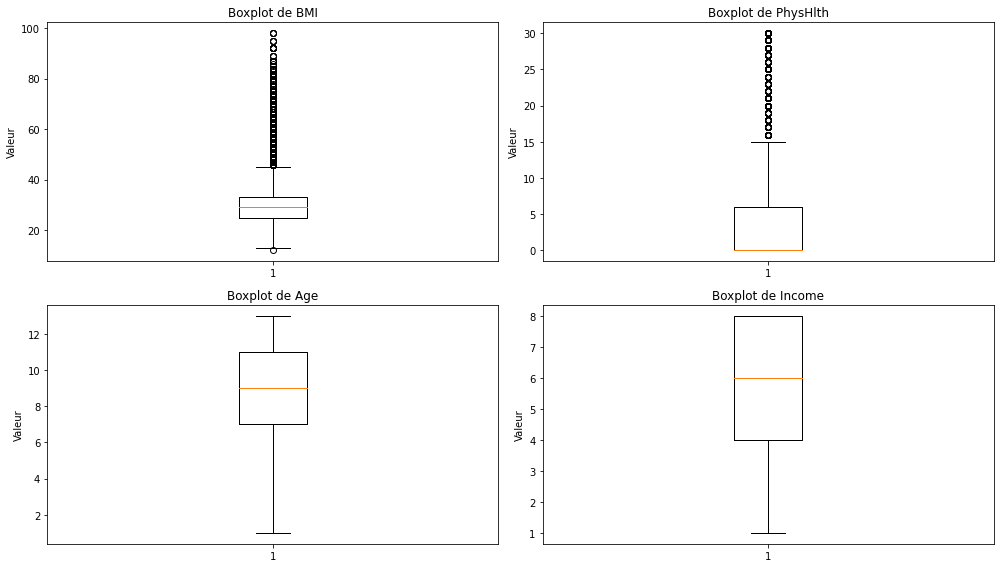

In [15]:
# Mettons ces variables dans Var_Outlier
var_outlier = ["BMI", "PhysHlth", "Age", "Income"]
df_var_outlier = df[var_outlier]

#Faisons le graphe
plt.figure(figsize=(14,8))

#Faisons un loop pour eviter la repition
for i,var in enumerate(var_outlier,1):
    plt.subplot(2,2,i)
    plt.boxplot(df_var_outlier[var])
    plt.title(f'Boxplot de {var}')
    plt.ylabel('Valeur')

plt.tight_layout()
plt.show()

#### *Remarque et conseil*
1. Le BMI a beaucoup d'outlier allant au-dessus de 45-50,ce n'est pas un probleme par ce que le BMI(Indice de Masse Corporelle) est fortement lié à l’obésité 
2. Le PhysHlth a des gens qui ont fais 0 jours malade et certains > 20 jours. Cela reflète un comportement réel (peu de gens malades longtemps).


#### 3.5 Definir X (varibles independante) et y(variable dependannte) 


In [17]:
# Definir X
X = df_copy.drop(["Diabetes_binary"], axis=1)

# Definir y
y = df_copy["Diabetes_binary"]

#Normalisation
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

#Split train/test
X_train,X_test,y_train,y_test = train_test_split(X_scaler,y,test_size=0.2,random_state=42,stratify=y)

# 4. Modèle (Approche itérative)

In [19]:
#créer un objet model regrssion logistique
reg_log = LogisticRegression(max_iter=1000)

#entrainer notre model
reg_log.fit(X_train,y_train)

#Predire notre model
y_pred = reg_log.predict(X_test)

# 5. Evaluation du modèle

In [43]:
#Accuracy taux de bonne prediction
acc = accuracy_score(y_test,y_pred)
print("Accuracy :", acc)

#Matrice de confusion
mc = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :", mc)

#Rapport de classification (Precision, Recall, F1-score)
print("Rapport de classification :" , classification_report(y_test,y_pred))

Accuracy : 0.7438291251149304
Matrice de confusion : [[5139 1931]
 [1691 5378]]
Rapport de classification :               precision    recall  f1-score   support

         0.0       0.75      0.73      0.74      7070
         1.0       0.74      0.76      0.75      7069

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139



## Choisir une autre (Arbre de Décision) modèle 

In [55]:
params = {"max_depth": [3, 5, 7], "min_samples_split": [2, 5, 10]}
grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=5, scoring="recall")
grid_tree.fit(X_train, y_train)

y_pred_tree = grid_tree.predict(X_test)

#Accuracy taux de bonne prediction
acc = accuracy_score(y_test,y_pred_tree)

print("=== Arbre de Décision (Optimisé) ===")
print("Accuracy :", acc)
print("Meilleurs hyperparamètres :", grid_tree.best_params_)
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


=== Arbre de Décision (Optimisé) ===
Accuracy : 0.7136996958766533
Meilleurs hyperparamètres : {'max_depth': 3, 'min_samples_split': 2}
[[4155 2915]
 [1133 5936]]
              precision    recall  f1-score   support

         0.0       0.79      0.59      0.67      7070
         1.0       0.67      0.84      0.75      7069

    accuracy                           0.71     14139
   macro avg       0.73      0.71      0.71     14139
weighted avg       0.73      0.71      0.71     14139



## Tracons le graphe pour determiner qui est le plus performant!

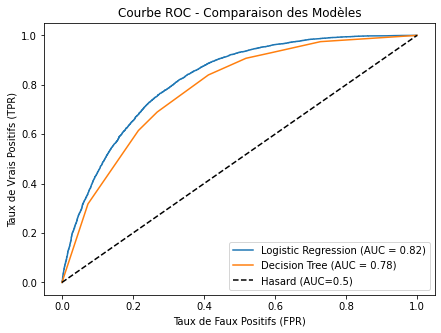

In [61]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# ----- Logistic Regression -----
y_proba_log = reg_log.predict_proba(X_test)[:,1]  # probabilité classe 1
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
auc_log = roc_auc_score(y_test, y_proba_log)

# ----- Decision Tree -----
y_proba_tree = grid_tree.best_estimator_.predict_proba(X_test)[:,1]
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_proba_tree)
auc_tree = roc_auc_score(y_test, y_proba_tree)

# ----- Tracé -----
plt.figure(figsize=(7,5))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.2f})")
plt.plot(fpr_tree, tpr_tree, label=f"Decision Tree (AUC = {auc_tree:.2f})")
plt.plot([0,1], [0,1], 'k--', label="Hasard (AUC=0.5)")

plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.title("Courbe ROC - Comparaison des Modèles")
plt.legend()
plt.show()


# Conclusion: 
#### Dans le graphe on constate que le model Regression Logistique est très equilibré et a une AUC forte qui depasse le model Arbre de Décision, ce qui prouve qu'il est meilleur mais en se basant sur notre obectif de "trouver les patients qui sont Diabetique" avec un (Recall = 0.84). ,alors notre choix est sans doute le model Arbre de Décision